In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def analyze_file(file_path):
    print(f"Analyzing file: {file_path}")
    
    # Load the data
    data = pd.read_csv(file_path)
    
    # Basic data cleaning
    data.fillna("NONE", inplace=True)  # Replace missing values with 'NONE'
    
    # Analysis of stance distribution
    biden_stance_count = data['biden_stance'].value_counts()
    trump_stance_count = data['trump_stance'].value_counts()
    
    # Display stance distribution
    print("Biden Stance Distribution:")
    print(biden_stance_count)
    print("\nTrump Stance Distribution:")
    print(trump_stance_count)
    
    # Data preparation for comparison graph
    comparison_data = pd.DataFrame({
        'Biden': biden_stance_count,
        'Trump': trump_stance_count
    }).fillna(0)  # Fill missing values which might appear if one category is absent in one of the columns

    # Create comparison graph
    comparison_data.plot(kind='bar', color=['blue', 'red'], figsize=(10, 6))
    plt.title('Comparison of Stances Towards Biden and Trump')
    plt.xlabel('Stance')
    plt.ylabel('Count')
    plt.xticks(rotation=0)  # Keep the stance labels horizontal for better readability
    plt.show()
    
    # Check if there's any correlation between stances towards Biden and Trump
    correlation = data[['biden_stance', 'trump_stance']].apply(lambda x: pd.factorize(x)[0]).corr()
    print("\nCorrelation between Biden and Trump stances:")
    print(correlation)

Analyzing file: ../comments/trump_guilty/CNN-Donald Trump convicted of falsifying business records in hush money scheme_classified.csv
Biden Stance Distribution:
biden_stance
NONE       3046
FAVOR       332
AGAINST     313
Name: count, dtype: int64

Trump Stance Distribution:
trump_stance
AGAINST    1802
FAVOR      1260
NONE        629
Name: count, dtype: int64


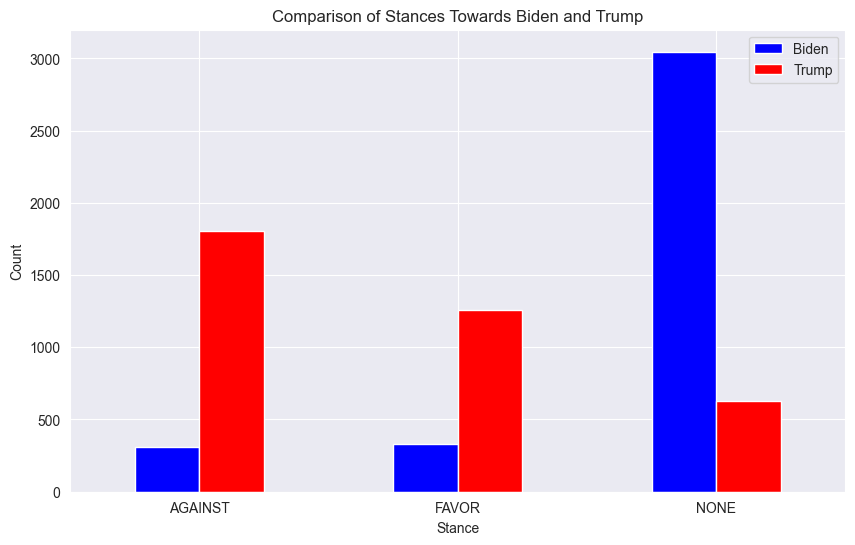


Correlation between Biden and Trump stances:
              biden_stance  trump_stance
biden_stance      1.000000      0.134785
trump_stance      0.134785      1.000000
Analyzing file: ../comments/trump_guilty/Fox News-Trump found guilty on all 34 counts_classified.csv
Biden Stance Distribution:
biden_stance
NONE       346
FAVOR       48
AGAINST     36
Name: count, dtype: int64

Trump Stance Distribution:
trump_stance
AGAINST    248
FAVOR      120
NONE        62
Name: count, dtype: int64


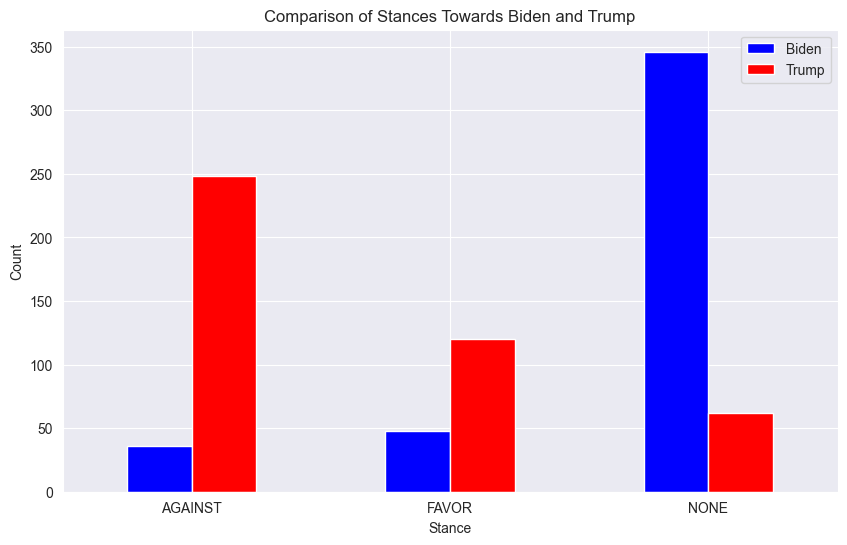


Correlation between Biden and Trump stances:
              biden_stance  trump_stance
biden_stance       1.00000      -0.03499
trump_stance      -0.03499       1.00000


In [3]:
data_dir = "../comments/trump_guilty/"
files = [f for f in os.listdir(data_dir) if f.endswith('classified.csv')]
for file in files:
    analyze_file(data_dir + file)